In [15]:
import distillation.amundson_1958 as am
model = am.Model(
   components=['n-Butane', 'n-Pentane', 'n-Octane'],
    F=1000., # feed flow rate, kmol/h
    P=2*1e5, # feed pressure, Pa
    z_feed=[0.2, 0.5, 0.3],  # composition of feed
    RR=1.,  # reflux ratio, L/D
    D=400., # distillate flow rate, kmol/h
    N=3,    # number of equilibrium contacts
    feed_stage=2,  # feed stage
)

In [16]:
model.add_parameters(verbose=True)

Setting DePriester parameters for n-Butane:
             a_T1 [deg Rankine^2]: -1280557.0
             a_T2 [deg Rankine]: 0.0
             a_T6 [dimensionless]: 7.94986
             a_p1 [dimensionless]: -0.96455
             a_p2 [psia^2]: 0.0
             a_p3 [psia]: 0.0
     K value at 300 K, 1 bar=  2.661186999988651
Setting DePriester parameters for n-Pentane:
             a_T1 [deg Rankine^2]: -1524891.0
             a_T2 [deg Rankine]: 0.0
             a_T6 [dimensionless]: 7.33129
             a_p1 [dimensionless]: -0.89143
             a_p2 [psia^2]: 0.0
             a_p3 [psia]: 0.0
     K value at 300 K, 1 bar=  0.7541583496653457
Setting DePriester parameters for n-Octane:
             a_T1 [deg Rankine^2]: 0.0
             a_T2 [deg Rankine]: -7646.81641
             a_T6 [dimensionless]: 12.48457
             a_p1 [dimensionless]: -0.73152
             a_p2 [psia^2]: 0.0
             a_p3 [psia]: 0.0
     K value at 300 K, 1 bar=  0.026447701262845617
Setting heat capac

In [17]:
print(model.T_feed)
model.T_feed = model.bubble_T_feed()
print(model.T_feed)

300.0
325.9228553172105


In [18]:
print(model.T)
for stage in model.stages:
    model.T[stage] = model.T_feed
print(model.T)

[0. 0. 0. 0. 0.]
[325.92285532 325.92285532 325.92285532 325.92285532 325.92285532]


In [5]:
print(model.L)
print(model.V)
model.initialize_flow_rates()
print(model.L)
print(model.V)

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[ 400.  400. 1400. 1400.  600.]
[  0. 800. 800. 800. 800.]


In [6]:
for i in model.components:
    print(model.K[i])
model.update_K_values()
for i in model.components:
    print(model.K[i])

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[2.66708293 2.66708293 2.66708293 2.66708293 2.66708293]
[0.90369028 0.90369028 0.90369028 0.90369028 0.90369028]
[0.04912757 0.04912757 0.04912757 0.04912757 0.04912757]


In [7]:
for i in model.components:
    print(i, model.l[i])
for i in model.components:
    model.solve_component_mass_bal(i)
for i in model.components:
    print(i, model.l[i])

n-Butane [0. 0. 0. 0. 0.]
n-Pentane [0. 0. 0. 0. 0.]
n-Octane [0. 0. 0. 0. 0.]
n-Butane [179.60263554  67.34047646 162.03112415  92.93264798  20.39736446]
n-Pentane [171.96923989 190.29665687 701.52941836 723.2817078  328.03076011]
n-Octane [  0.40561865   8.25643611 308.55577913 319.21884018 299.59438135]


In [8]:
print(model.T)
for stage in model.stages:
    model.T[stage] = model.bubble_T(stage)
print(model.T)

[325.92285532 325.92285532 325.92285532 325.92285532 325.92285532]
[303.72023684 315.23211869 329.11529249 334.36700487 349.22473025]


In [9]:
print(model.T_is_converged())

False


In [10]:
iter = 0
while not model.T_is_converged():
    model.update_K_values()
    for i in model.components:
        model.solve_component_mass_bal(i)
    for stage in model.stages:
        model.T[stage] = model.bubble_T(stage)
    print(iter, model.T)
    iter += 1
    

0 [304.79769022 316.54177868 328.91284137 334.81286613 352.56298286]
1 [305.08689835 316.76725088 328.95365929 334.90881225 353.15598321]
2 [305.14872565 316.81887903 328.97440211 334.94137048 353.28395853]
3 [305.16485337 316.83280482 328.9813168  334.95214755 353.31722965]
4 [305.16947901 316.83684806 328.98344049 334.95553793 353.32675925]


In [11]:
print(model.V)
model.solve_energy_balances()
print(model.V)

[  0. 800. 800. 800. 800.]
[  0.         717.41518111 695.84648532 722.41305238 705.65881365]


In [12]:
print(model.flow_rates_converged())
outer_loop = 0
inner_loop = 0
while not model.flow_rates_converged():
    outer_loop += 1
    for i in model.components:
        model.solve_component_mass_bal(i)
    for stage in model.stages:
        model.bubble_T(stage)
    while not model.T_is_converged():
        inner_loop += 1
        model.update_K_values()
        for i in model.components:
            model.solve_component_mass_bal(i)
        for stage in model.stages:
            model.bubble_T(stage)
    model.solve_energy_balances()
    print(outer_loop, inner_loop, model.V)

False
1 0 [  0.         738.292652   767.77115514 773.32703543 751.74120703]
2 0 [  0.         730.02817097 744.02239833 761.15761768 738.97199799]
3 0 [  0.         732.51708636 752.20436954 766.83403041 744.44384013]
4 0 [  0.         731.53649421 749.45795577 765.35163755 742.98345861]
5 0 [  0.         731.82299258 750.42905567 766.00933955 743.63734869]
6 0 [  0.         731.70663379 750.1096647  765.83430365 743.46943734]
7 0 [  0.         731.73982281 750.2240964  765.91133408 743.54707015]
8 0 [  0.         731.72606726 750.18679166 765.89085414 743.52767455]
9 0 [  0.         731.72992374 750.20024498 765.89991523 743.53686776]


In [13]:
x = {}
y = {}
for i in model.components:
    x[i] = model.l[i][:]/model.L[:]
    y[i] = model.K[i]*x[i]

print(x)
print(y)

{'n-Butane': array([0.46809899, 0.23827382, 0.12628367, 0.06415599, 0.02126734]), 'n-Pentane': array([0.51323913, 0.80356382, 0.66139621, 0.69481466, 0.49117392]), 'n-Octane': array([0.00081447, 0.0263443 , 0.22958844, 0.26035483, 0.49945702])}
{'n-Butane': array([0.73971797, 0.51175545, 0.3608186 , 0.20855368, 0.09876638]), 'n-Pentane': array([0.24869112, 0.56110551, 0.64877264, 0.79475099, 0.85915399]), 'n-Octane': array([1.64870056e-05, 8.90433566e-04, 1.27321695e-02, 1.81756036e-02,
       6.74112130e-02])}


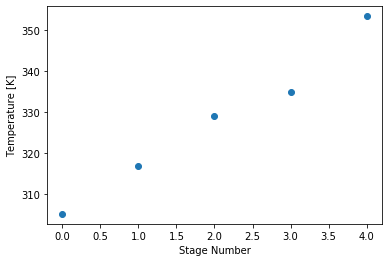

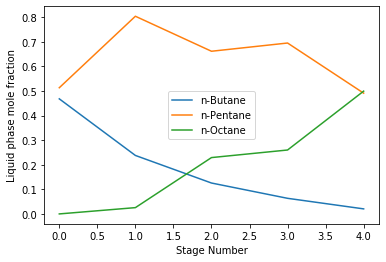

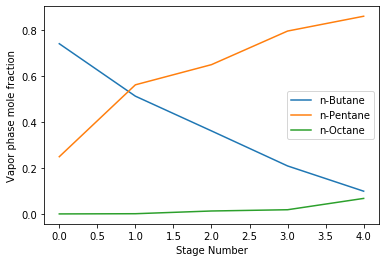

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(model.stages, model.T, 'o')
ax.set_xlabel('Stage Number')
ax.set_ylabel('Temperature [K]')

# plot liquid-phase mole fractions
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
# calculate mole fractions
for i in model.components:
    ax2.plot(model.stages, x[i], label=i)
ax2.set_ylabel('Liquid phase mole fraction')
ax2.set_xlabel('Stage Number')
ax2.legend()


fig3 = plt.figure(3)
ax3 = fig3.add_subplot(111)
# calculate mole fractions
for i in model.components:
    ax3.plot(model.stages, y[i], label=i)
ax3.set_ylabel('Vapor phase mole fraction')
ax3.set_xlabel('Stage Number')
ax3.legend()